<a href="https://colab.research.google.com/github/Jordan3448/ComputerVision/blob/main/Stereo_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###In this notebook, I will show how to estimate the depth of objects using two images taken from cameras separated horizontally in space (just like a left and right eye).

Specifically, I will use opencv's [StereoBM class](https://docs.opencv.org/3.4/d9/dba/classcv_1_1StereoBM.html)

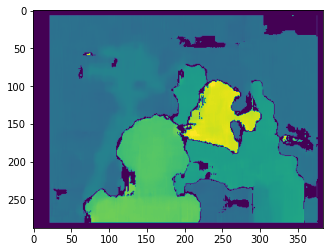

In [1]:
#import statements 
import cv2
import matplotlib.pyplot as plt
leftImg = cv2.imread('left.png', 0)
rightImg = cv2.imread('right.png', 0)
stereo_matcher_object = cv2.StereoBM.create(numDisparities=16, blockSize=15)

disp_map = stereo_matcher_object.compute(leftImg, rightImg)
plt.imshow(disp_map,)
plt.show()

Replace left.png and right.png with image captures.

I will use webcam and "code snippets" to do captures.

In [43]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo2.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo2.jpg


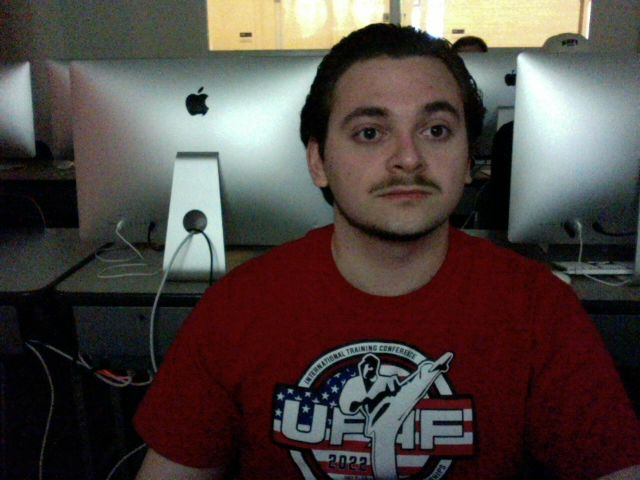

In [44]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

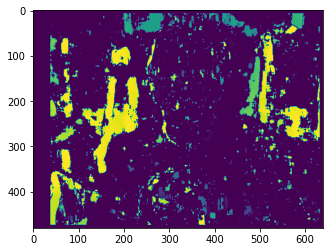

In [75]:
leftImg2 = cv2.imread('photo2.jpg', 0)
rightImg2 = cv2.imread('photo1.jpg', 0)
stereo_matcher_object = cv2.StereoBM.create(numDisparities=32, blockSize=15)

disp_map = stereo_matcher_object.compute(leftImg2, rightImg2)
plt.imshow(disp_map,)
plt.show()